# Loop Workflow Example 1

> * High level approach to making a 3D model from just a bounding box and source files as input. (In Australia only for now. Documentation to come)
> * To run this notebook, please download and unzip the Turner Syncline data folder (https://github.com/Loop3D/Turner_Syncline/) into where this notebook is running.

In [1]:
import time
import warnings

t0 = time.time()
warnings.filterwarnings('ignore')

## Map2Loop


 orientations layer  metadata
--------------------
    bbox [ 506680.48013113 7498960.6092396   544783.45459606 7517250.2104638 ]
    CRS {'init': 'epsg:28350'}
    # items 15
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 500000. 7490000.  545000. 7520000.]
    CRS {'init': 'epsg:28350'}
    # items 51
    Data types ['MultiPolygon', 'Polygon']

 fold layer  metadata
--------------------
    bbox [ 500000. 7490000.  545000. 7520000.]
    CRS {}
    # items 29
    Data types ['LineString']

 fault layer  metadata
--------------------
    bbox [ 500000. 7490000.  545000. 7520000.]
    CRS {'init': 'EPSG:28350'}
    # items 29
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    bbox [ 503344.19866124 7491970.09391213  544819.95020013 7519998.99751085]
    CRS {'init': 'epsg:28350'}
    # items 76
    Data types ['Point']

Warnings:
     No fold polarity for fold polylines
     No fault dip for fault polylines
     No fault

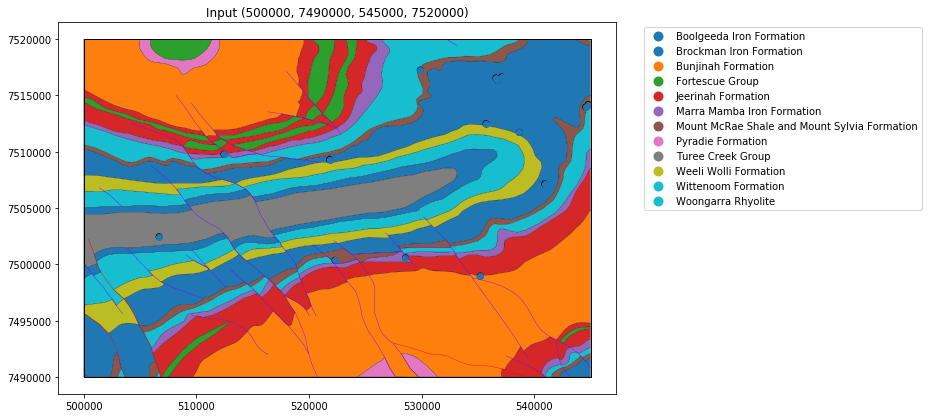

Generating topology analyser input...
51  polygons
76  points
15  points
Successful parameter load
Output directory created at: model-test/graph/
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:model-test/graph/
Done.
Generating topology graph display and unit groups...
0    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
1    'Hamersley Group', 'anchor': 'n', 'fontStyle': 'bold'
2    'Turee Creek Group', 'anchor': 'n', 'fontStyle': 'bold'
3    'Boolgeeda Iron Formation'
4    'Brockman Iron Formation'
5    'Bunjinah Formation'
6    'Fortescue Group'
7    'Jeerinah Formation'
8    'Marra Mamba Iron Formation'
9    'Mount McRae Shale and Mount Sylvia Formation'
10    'Pyradie Formation'
11    'Turee Creek Group'
12    'Weeli Wolli Formation'
13    'Wittenoom Formation'
14    'Woongarra Rhyolite'
Topology figure saved to model-test/tmp/topology-fig.png
Done
Fetching DTM...  bbox:116.9 117.5381274167068 -22.797195219807712 -22.325585124071004
Attempt: 0   

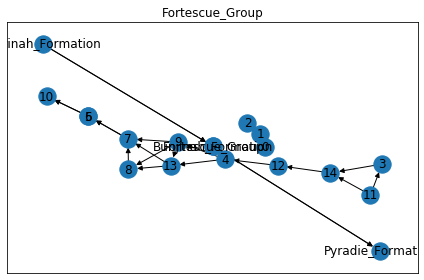

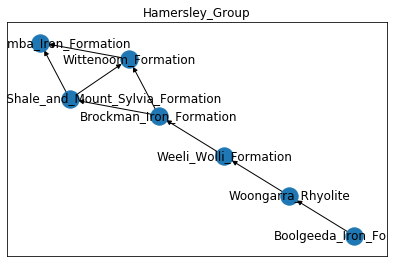

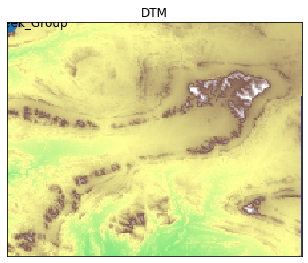

,index,min,max,ave
group_,,,,
Turee_Creek_Group,0,2208.0,2449.0,2328.5
Hamersley_Group,1,2208.0,2629.0,2418.5
Fortescue_Group,2,2629.0,2780.0,2704.5


[]

{0: 'Fortescue_Group', 1: 'Hamersley_Group', 2: 'Turee_Creek_Group'}

group choices: 1
dtb and dtb_null set to 0
15 orientations saved to model-test/output/orientations.csv
extra orientations saved as model-test/output/empty_series_orientations.csv
basal contacts saved allpts= 1869 deci_pts= 522
saved as model-test/tmp/all_contacts.csv and model-test/tmp/contacts.csv
basal contacts without faults saved as model-test/tmp/basal_contacts.shp
decimated contacts saved as model-test/output/contacts4.csv
All observations n= 15
groups ['Fortescue Group' 'Hamersley Group' 'Turee Creek Group'] 
codes ['Pyradie Formation' 'Brockman Iron Formation' 'Jeerinah Formation'
 'Woongarra Rhyolite' 'Boolgeeda Iron Formation'
 'Mount McRae Shale and Mount Sylvia Formation' 'Wittenoom Formation'
 'Fortescue Group' 'Weeli Wolli Formation' 'Marra Mamba Iron Formation'
 'Turee Creek Group' 'Bunjinah Formation']


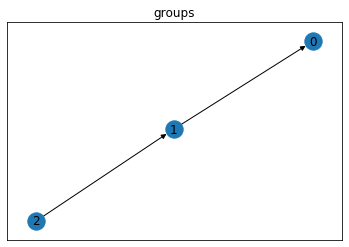

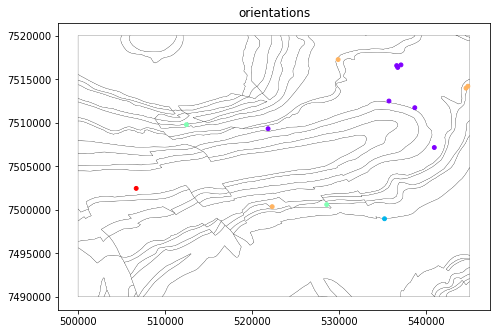

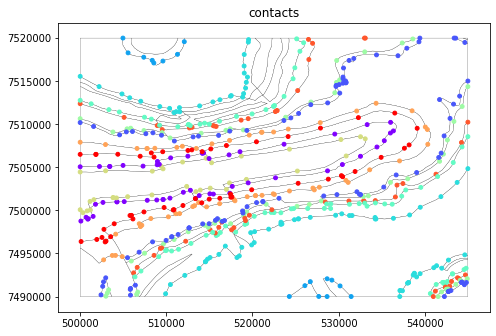

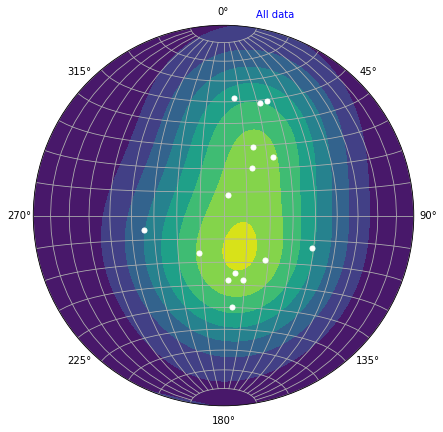

----------------------------------------------------------------------------------------------------------------------
Fortescue Group observations has 1 observation
----------------------------------------------------------------------------------------------------------------------
Hamersley Group observations n= 13
strike/dip of girdle 11.180205562007984 / 81.95747948449605


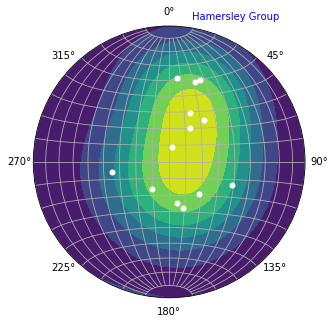

----------------------------------------------------------------------------------------------------------------------
Turee Creek Group observations has 1 observation


,plunge,bearing,num orientations
Hamersley Group,8.042521,281.180206,13
Fortescue Group,-999.000000,-999.000000,1
Turee Creek Group,-999.000000,-999.000000,1


91 61
interpolated dips


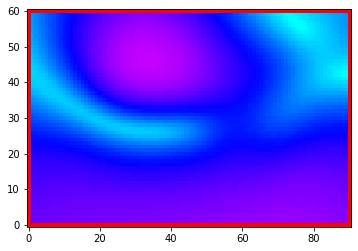

interpolated dip directions


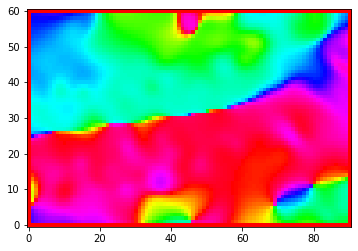

interpolated contacts


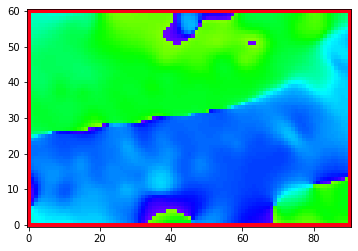

fault orientations saved as model-test/output/fault_orientations.csv
fault positions saved as model-test/output/faults.csv
fault dimensions saved as model-test/output/fault_dimensions.csv
fault displacement estimates saved as model-test/output/fault_displacements3.csv
near-fault orientations saved as model-test/tmp/ex_f_combo_full.csv
near-fault orientations saved as model-test/tmp/ex_f_combo_full.csv
0 Turee_Creek_Group
1 Hamersley_Group
2 Fortescue_Group
pluton contacts and orientations saved as:
model-test/output/ign_contacts.csv
model-test/output/ign_orientations_domes.csv
Propagating dips along contacts...
66
343 points saved to model-test/tmp/raw_contacts.csv
281 thickness estimates saved as model-test/output/formation_thicknesses.csv
['Bunjinah_Formation' 'Jeerinah_Formation' 'Marra_Mamba_Iron_Formation'
 'Boolgeeda_Iron_Formation' 'Mount_McRae_Shale_and_Mount_Sylvia_Formation'
 'Weeli_Wolli_Formation' 'Wittenoom_Formation' 'Woongarra_Rhyolite'
 'Brockman_Iron_Formation'] alread

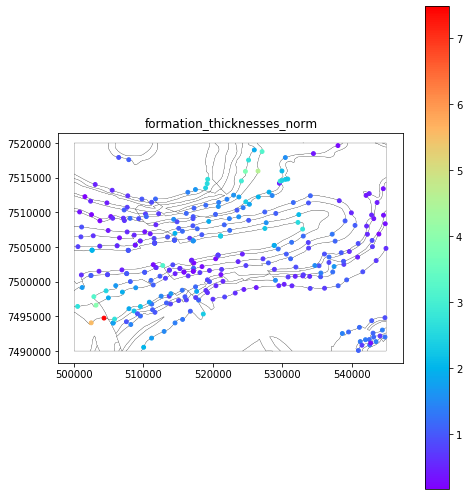

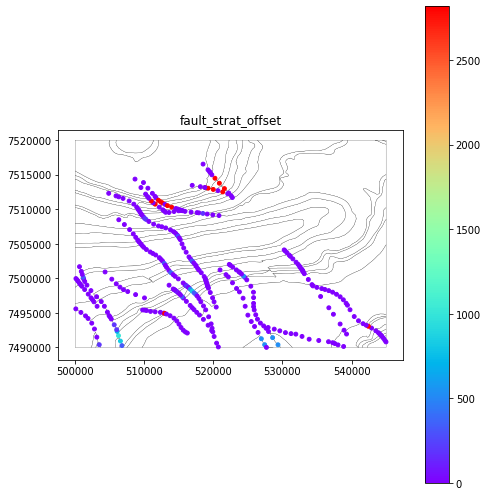

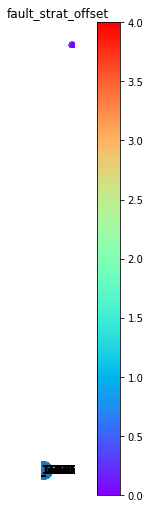

In [2]:
from map2loop.project import Project

proj = Project( geology_file="Turner_Syncline/tmp/geol_clip.shp",
                 fault_file="Turner_Syncline/tmp/GEOS_GEOLOGY_LINEARSTRUCTURE_500K_GSD.csv",
                 fold_file="Turner_Syncline/tmp/GEOS_GEOLOGY_LINEARSTRUCTURE_500K_GSD.csv",
                 structure_file="Turner_Syncline/tmp/structure_clip.shp",
                 mindep_file="Turner_Syncline/tmp/mindeps_clip.shp")

proj.update_config(
                    bbox_3d={
                         "minx": 500000,
                         "miny": 7490000,
                         "maxx": 545000,
                         "maxy": 7520000,
                         "base": -3200,
                         "top": 1200,
                     },
                    proj_crs={'init': 'EPSG:28350'},
                  )

proj.run()

## Loop Structural

In [3]:
# Define project pathing from m2l
proj_path = proj.config.project_path
graph_path = proj.config.graph_path
tmp_path = proj.config.tmp_path
data_path = proj.config.data_path
dtm_path = proj.config.dtm_path
output_path = proj.config.output_path
vtk_path = proj.config.vtk_path

# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

fault_file = proj.config.fault_file_csv


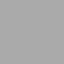

Object exists: supergroup_0_norm_cp
Object exists: supergroup_0_value_cp
m2l 1.1493131240208945 LoopStructural 1.435893710454305 Total 2.5852068344751995 minutes


In [4]:
import random
import os
import time
from datetime import datetime
import shutil
import logging
logging.getLogger().setLevel(logging.ERROR)

import numpy as np
from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel

nowtime=datetime.now().isoformat(timespec='minutes')   
model_name='leaflet'+'_'+nowtime.replace(":","-").replace("T","-")
if (os.path.exists(vtk_path+model_name)):
    shutil.rmtree(vtk_path+model_name)
os.mkdir(vtk_path+model_name)
filename=vtk_path+model_name+'/'+'surface_name_{}.vtk'


f=open(tmp_path+'bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()
t1 = time.time()
fault_params = {'interpolatortype':'FDI',
                'nelements':3e4,
                'data_region':.1,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'PLI' , # 'interpolatortype':'PLI',
                    'nelements':1e5,  # how many tetras/voxels
                    'buffer':0.8,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'damp':True}

if(not os.path.exists(fault_file)):
    f=open(output_path + '/fault_displacements3.csv','w')
    f.write('X,Y,fname,apparent_displacement,vertical_displacement,downthrow_dir\n')
    f.close()
    f=open(output_path + '/fault_orientations.csv','w')
    f.write('X,Y,Z,DipDirection,dip,DipPolarity,formation\n')
    f.close()
    f=open(output_path + '/faults.csv','w')
    f.write('X,Y,Z,formation\n')
    f.close()
    f=open(output_path + '/fault-fault-relationships.csv','w')
    f.write('fault_id\n')
    f.close()
    f=open(output_path + '/group-fault-relationships.csv','w')
    f.write('group\n')
    f.close()

    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=True,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)
else:
    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)

view = LavaVuModelViewer(model,vertical_exaggeration=1) 
view.nsteps = np.array([200,200,200])
#view.set_zscale(2)
view.add_model(cmap='tab20')
view.nsteps=np.array([50,50,50])
#view.add_model_surfaces(filename=filename)
view.add_model_surfaces()
for sg in model.feature_name_index:
    if( 'super' in sg):
        view.add_data(model.features[model.feature_name_index[sg]])
view.interactive()  

for sg in model.feature_name_index:
    if( 'super' in sg):
        view.add_data(model.features[model.feature_name_index[sg]])

t2 = time.time()
print("m2l",(t1-t0)/60.0,"LoopStructural",(t2-t1)/60.0,"Total",(t2-t0)/60.0,"minutes")